Домашнее задание 1

# Patterned Pixel Grouping

В этом задании надо было воспроизвести один из алгоритмов demosaicing-а

Я выбрала алгоритм Patterned Pixel Grouping


In [1]:
import numpy as np
import cv2

In [2]:
img = cv2.imread('RGB_CFA.bmp', cv2.IMREAD_UNCHANGED)

сначала посмотрим на изображение, его размер

In [3]:
window_name = 'img'
  
cv2.imshow(window_name, img)

cv2.waitKey(0) 
  

-1

In [4]:
img.shape

(2073, 4176, 3)

алгоритм состоит из трех шагов

первым шагом дополним незаполненные зеленые компоненты

для этого сначала смотрим, в каком направлении меньше всего "меняется" изображение, вычислив градиент.

потом определяем значение зеленой компоненты усредняя компоненты зеленого вдоль направления, в котором меньше всего  "меняется" изображение


In [5]:
def step_1_green (img, i, j):
    col = r
    if i % 2 == 1:
            col = b
    def abs_grad(direction, col, img, i, j):
        direct = directions[direction]
        return abs(abs(int(img[i][ j][col]) - int(img[i+ 2*direct[0]][ j+2*direct[1]] [col]))* 2 + abs(int(img[i- direct[0] ][ j - direct[1]] [g]) - int(img[i+ direct[0] ][ j + direct[1]][g])))
    
    
    grads = {}
    for direct in directions.keys():
        grads[direct] = abs_grad(direct, col, img, i, j)
    
    def green(direction, col, img, i, j):
        direct = directions[direction]
        
        return  (int(img[i+ direct[0] ][ j + direct[1]][g]) * 3 + int(img[i- direct[0] ][ j - direct[1]][g]) + int(img[i][j][col]) -  int(img[i + 2*direct[0]][ j+2*direct[1]][col])) / 4
    img[i][j][g] = form(green(min(grads), col, img, i, j))
    return img[i][j][g]

In [6]:
type(img[0][0][0])

numpy.uint8

числа в img принадлежат [0, 255], поэтому перед тем, как положить число в матрицу, проверим, что оно из интервала [0, 255] 

(если этого не сделать сразу ошибки не будет, а число преобразуется автоматически и не так, как надо и ошибку будет сложно найти )

In [7]:
def form(a):
    if a < 0:
        return 0
    if a > 255:
        return 255
    return a

In [8]:
# вспомогательная функция
def hue_transit(l_1, l_2, l_3, v_1, v_3):
        if (l_1 < l_2 and l_2 < l_3) or (l_1 > l_2 and l_2 > l_3) :
            return int(v_1) + (int(v_3) - int(v_1)) * ((int(l_2) - int(l_1))/(int(l_3) - int(l_1)))
        else:
            return (int(v_1) + int(v_3)) / 2 + (int(l_2) - (int(l_1) + int(l_3)) / 2) / 2 

вторым шагом определим красные и синии компоненты, в клетках, в которых неопределены красный и синий  одновременно

мы смотрим на "поведение" зеленых компонент в центральной и соседних клетках и определяем значение красной и синей комепонент так, чтобы их поведение в  центральной и соседних клетках было похоже на поведение зеленых компонент


In [9]:
def step_2_r_b(img, i, j):
    r = 2
    b = 0
    if i%2 == 1:
        img[i][j][r] =form( hue_transit(img[i - 1][j][g], img[i][j][g], img[i+1][j][g], img[i - 1][j][r],  img[i+1][j][r]))
        img[i][j][b] = form( hue_transit( img[i][j - 1][g], img[i][j][g], img[i][j + 1][g], img[i][j - 1][b], img[i][j + 1][b]))
    else:
        img[i][j][b] = form( hue_transit(img[i - 1][j][g], img[i][j][g], img[i+1][j][g], img[i - 1][j][b],  img[i+1][j][b]))
        img[i][j][r] = form( hue_transit( img[i][j - 1][g], img[i][j][g], img[i][j + 1][g], img[i][j - 1][r], img[i][j + 1][r]))

вычислим компоненту B для пикселей, имевших компоненту R, и наоборот.

для этого (как в шаге 1) сначала смотрим, в каком направлении ('NW' или 'NE') меньше всего "меняется" изображение, вычислив градиент.

потом определяем значение  компоненты (B или R) имитируя "поведение"  компоненты зеленого вдоль  направления найменьшего градиента

In [10]:
def step_3_r_b(img, i, j):
    
    #directions = {'ne': [-1, 1], 'nw': [1, 1]}
    col  = b
    if i%2==1  :
        col = r
    def grad_s_3(direction, col, img, i, j):
        direct = directions[direction]
        return abs(int(img[i + direct[0]][j + direct[1]][col]) - int(img[i - direct[0]][j - direct[1]][col])) + abs(int(img[i + 2*direct[0]][j + 2*direct[1]][(col//2 +2)%3]) - int(img[i ][j ][(col//2 +2)%3])) + abs(int(img[i - 2*direct[0]][j - 2*direct[1]][(col//2 +2)%3]) - int(img[i ][j ][(col//2 +2)%3])) + abs(int(img[i + direct[0]][j + direct[1]][g]) - int(img[i ][j ][g])) + abs(int(img[i - direct[0]][j - direct[1]][g]) - int(img[i ][j ][g]))
        
           
    d_nw = grad_s_3('nw',col, img, i, j)
    d_ne = grad_s_3('ne', col, img, i, j)
    
    if d_ne < d_nw:
        img[i][j][col] = form( hue_transit(img[i + 1][j - 1][g], img[i][j][g], img[i - 1][j + 1][g], img[i+1][j-1][col], img[i-1][j+1][col]))
        return img[i][j][col] 
    else:
        img[i][j][col] = form( hue_transit(img[i + 1][j + 1][g], img[i][j][g], img[i - 1][j - 1][g], img[i+1][j+1][col], img[i-1][j-1][col]))
        return img[i][j][col] 

In [14]:
r =2
g = 1
b = 0
directions = {'n': np.array([-1, 0]), 's': np.array([1, 0]), 'e':np.array([0, 1]), 'w': np.array([0, -1]), 'ne': [-1, 1], 'nw': [1, 1]}


In [15]:
def ppg(img):
   # r =2
   # g = 1
   # b = 0
   # directions = {'n': np.array([-1, 0]), 's': np.array([1, 0]), 'e':np.array([0, 1]), 'w': np.array([0, -1]), 'ne': [-1, 1], 'nw': [1, 1]}

    for i in range(2, img.shape[0] - 2):
        for j in range(2, img.shape[1] - 2):
            if i%2 == j%2:
                step_1_green (img, i, j)
    
    for i in range(2, img.shape[0] - 2):
        for j in range(2, img.shape[1] - 2):
            if i%2 != j%2:
                step_2_r_b(img, i, j)
    

    for i in range(2, img.shape[0] - 2):
        for j in range(2, img.shape[1] - 2):
            if i%2 == j%2:
                step_3_r_b(img, i, j)
    #return img


померяем время работы

In [16]:
%%time
ppg(img)


Wall time: 3min 9s


в данном изображннии 8.656848 мегапикселей, следовательно скорость работы   21.8   сек / мегапиксель

In [116]:
(img.shape[0]*img.shape[1])/1000000

8.656848

In [17]:
(3*60 + 9) / 8.656848

21.832426767802783

In [18]:
for i in [0, 1, img.shape[0] - 2, img.shape[0] - 1]:
        for j in range(1, img.shape[1] - 1):
            if i%2 == j%2:
                   img[i][j][g] = form(int(img[i][j - 1][g])+int(img[i][j + 1][g])/2)
            else:
                if i%2 == 1:
                    img[i][j][b] = form(int(img[i][j - 1][b])+int(img[i][j + 1][b])/2)
                else:
                    img[i][j][r] = form(int(img[i][j - 1][r])+int(img[i][j + 1][r])/2)
           

        
for i in [0, 1, img.shape[0] - 2, img.shape[0] - 1]:
        for j in range(1, img.shape[1] - 1):        
        
            if i == 1:
                img[i][j][r] = form(int(img[i - 1][j][r])+int(img[i + 1][j][r])/2)
            if i == 0:
                img[i][j][b] = img[i + 1][j][b]

            if i == (img.shape[0] - 2):
                img[i][j][r] = form(int(img[i - 1][j][r])+int(img[i + 1][j][r])/2)
            if i == (img.shape[0] - 1):
                img[i][j][b] = img[i - 1][j][b]


In [19]:
for j in [0, 1, img.shape[1] - 2, img.shape[1] - 1]:
        for i in range(1, img.shape[0] - 1):
            if i%2 == j%2:
                img[i][j][g] = form(int(img[i- 1][j][g])+int(img[i+1][j][g])/2)
            else:
                if j%2 == 1:
                    img[i][j][b] = form(int(img[i+1][j][b])+int(img[i-1][j][b])/2)
                else:
                    img[i][j][r] = form(int(img[i+ 1][j][r])+int(img[i- 1][j][r])/2)
            
for j in [0, 1, img.shape[1] - 2, img.shape[1] - 1]:
        for i in range(1, img.shape[0] - 1):
            
                if j%2 == 1:
                    img[i][j][r] = img[i][j - 1][r]
                else:
                    img[i][j][b] = img[i][j + 1][b]
                                

In [20]:
img[0][0][b] = img[1][1][b]
img[0][0][g] = img[1][1][g]

img[img.shape[0] - 1][0][b] = img[img.shape[0] - 2][1][b]
img[img.shape[0] - 1][0][r] = img[img.shape[0] - 2][1][r]

img[0][img.shape[1] - 1][b] = img[1][img.shape[1] - 2][b]
img[0][img.shape[1] - 1][r] = img[1][img.shape[1] - 2][g]

img[img.shape[0] - 1][img.shape[1] - 1][g] = img[img.shape[0] - 2][img.shape[1] - 2][g]
img[img.shape[0] - 1][img.shape[1] - 1][r] = img[img.shape[0] - 2][img.shape[1] - 2][g]

сохраним получившуюся картинку

In [22]:
cv2.imwrite('result.bmp', img)

True

Исследуемый алгоритм демозаикинга вычисляет значение клетки как функцию от соседних клеток, которая похожа на взвешенную сумму соседних клеток

поэтому он хорошо работает на плавных переходах цвета (это видно на  растяжке и картинке)


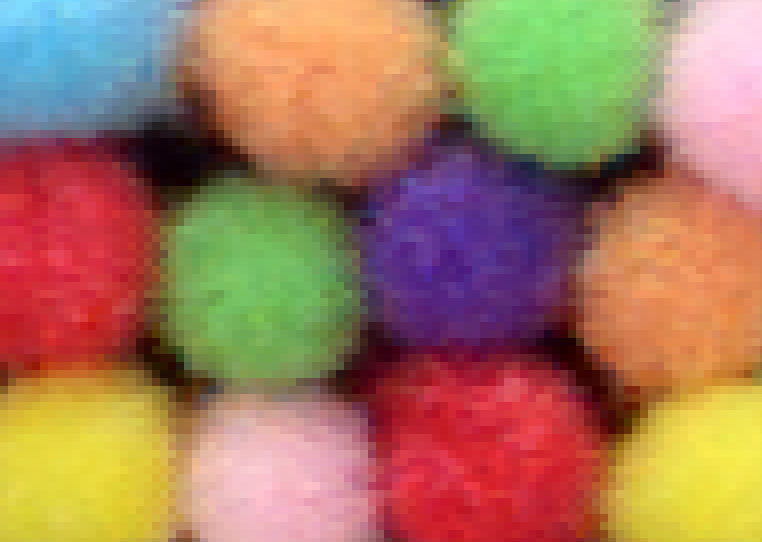

In [23]:
from IPython.display import Image
Image("color.png")

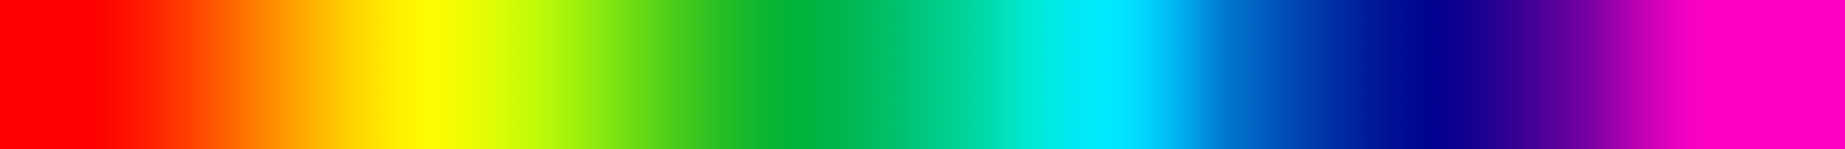

In [24]:
Image("color_.png")

 но на четких границах оставляет артефакты в виде 1 - 4 цветных пикселей на границе фигуры, которые являются средним границы и фона


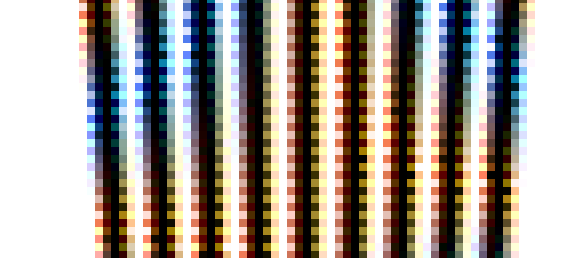

In [25]:
Image("artefacts.png")

по этой причине черно-белый шум превращается в цветной т. к. это много маленьких (1 - 5 пиксилей) фигур с относительно четкими границами

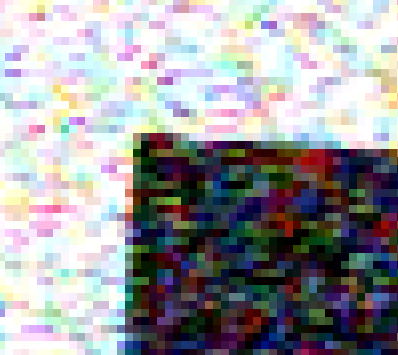

In [80]:
Image("noise.png")

оценим разрешение полученной картинки

по горизонтали и верликали 11 штрихов на мм изображения

у исходного изображения разрешение горизонтали и верликали 16 штрихов на мм изображения

следовательно разрешение  восстановленного изображения уменьшилось в 1.45 раз по сравнению с оригиналом

In [27]:
16/11

1.4545454545454546

померяем PSNR

In [49]:
img_or = cv2.imread('RGB_CFA.bmp', cv2.IMREAD_UNCHANGED)

In [70]:
cv2.PSNR(img_or, img, 255)

3.2055732329367

In [51]:
# я много перепроверяла 

In [75]:
def y(img):
    return 0.299*img[:,:,2] + 0.587 *img[:,:,1] + 0.114*img[:,:,0]

def psnr(img_1, img_2):
    
    mse = np.mean((y(img_1) - y(img_2))**2)
    p = 10 * np.log10(255*255/mse)
    return p

In [76]:
psnr(img_or, img)

5.405277225921475

In [73]:
cv2.PSNR(y(img_or), y(img), 255)

5.405277225921514

In [ ]:
# получается, что библиотеная функция считает метрику не для серого

In [79]:
img_y = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_or_y = cv2.cvtColor(img_or, cv2.COLOR_BGR2GRAY)
cv2.PSNR(img_y, img_or_y)

5.405732339122318